# Getting started with Ames housing dataset on Google Colab

## Some useful short-cuts
Comment out code (win): CTRL + /

Comment out code (OSX): CMD + /

Execute cell (win/OSX): SHFT + Enter

## Import libraries

In [30]:
# Main libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Library to connect Colab with Google Drive.
from google.colab import drive

## Mount Google Drive to Colab

In [36]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load 'Ames Housing' Data - demonstrating three different ways

1 - Click on the 'AmesHousing.csv' file in the ['ames-housing'](https://github.com/jads-nl/discover-projects/tree/main/ames-housing) repo on GitHub. Click on the **Raw** button. Copy the link in the URL bar. Paste the link in the Pandas function 'read_csv()': 


In [32]:
#df_original = pd.read_csv('https://raw.githubusercontent.com/jads-nl/discover-projects/main/ames-housing/AmesHousing.csv')

2 - Right click on the 'AmesHousing.csv' file in the ['ames-housing'](https://github.com/jads-nl/discover-projects/tree/main/ames-housing) repo on GitHub, and copy link to the file. Paste the link in the Pandas function 'read_csv' and add '?raw=True': 


In [33]:
#df_original = pd.read_csv('https://github.com/jads-nl/discover-projects/blob/main/ames-housing/AmesHousing.csv'+'?raw=True')

3 - In case the csv file is located on your Google Drive and you have mounted your GoogleDrive to Colab, add a link to the concerned file in the Pandas function 'read_csv'. Of course, in your case the csv file will most likely have a different path:

In [38]:
df_original = pd.read_csv('drive/MyDrive/Colab Notebooks/2021 05 - Foundation II/AmesHousing.csv')

Make copy of original data, so you have the original data for reference later if needed.

In [39]:
df = df_original.copy()

## Few basic functions to check the data

In [40]:
# Show dimensions of the data frame.
df.shape

(2930, 82)

In [41]:
# Show key information of each of the columns in the data frame
#df.info()

In [42]:
# Show statistics of numerical data:
df.describe(include="number")

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2928.000000,2928.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2771.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,559.262547,1051.614544,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,1978.132443,1.766815,472.819734,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,439.494153,440.615067,391.890885,428.395715,46.310510,505.508887,0.524820,0.245254,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,25.528411,0.760566,215.046549,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.250000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,466.000000,990.000000,1084.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,802.000000,1302.000000,1384.000000,703.750000,0.000000,1742.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [43]:
df.describe(include="object")

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
count,2930,2930,198,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2907,2930,2930,2930,2850,2850,2847,2850,2849,2930,2930,2930,2929,2930,2930,1508,2773,2771,2771,2771,2930,13,572,106,2930,2930
unique,7,2,2,4,4,3,5,3,28,9,8,5,8,6,8,16,17,5,4,5,6,5,5,4,6,6,6,5,2,5,5,8,5,6,3,5,5,3,4,4,5,10,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,2273,2918,120,1859,2633,2927,2140,2789,443,2522,2900,2425,1481,2321,2887,1026,1015,1752,1799,2549,1310,1283,2616,1906,859,2499,2885,1495,2734,2682,1494,2728,744,1731,1231,2615,2665,2652,4,330,95,2536,2413


<Figure size 2016x720 with 0 Axes>

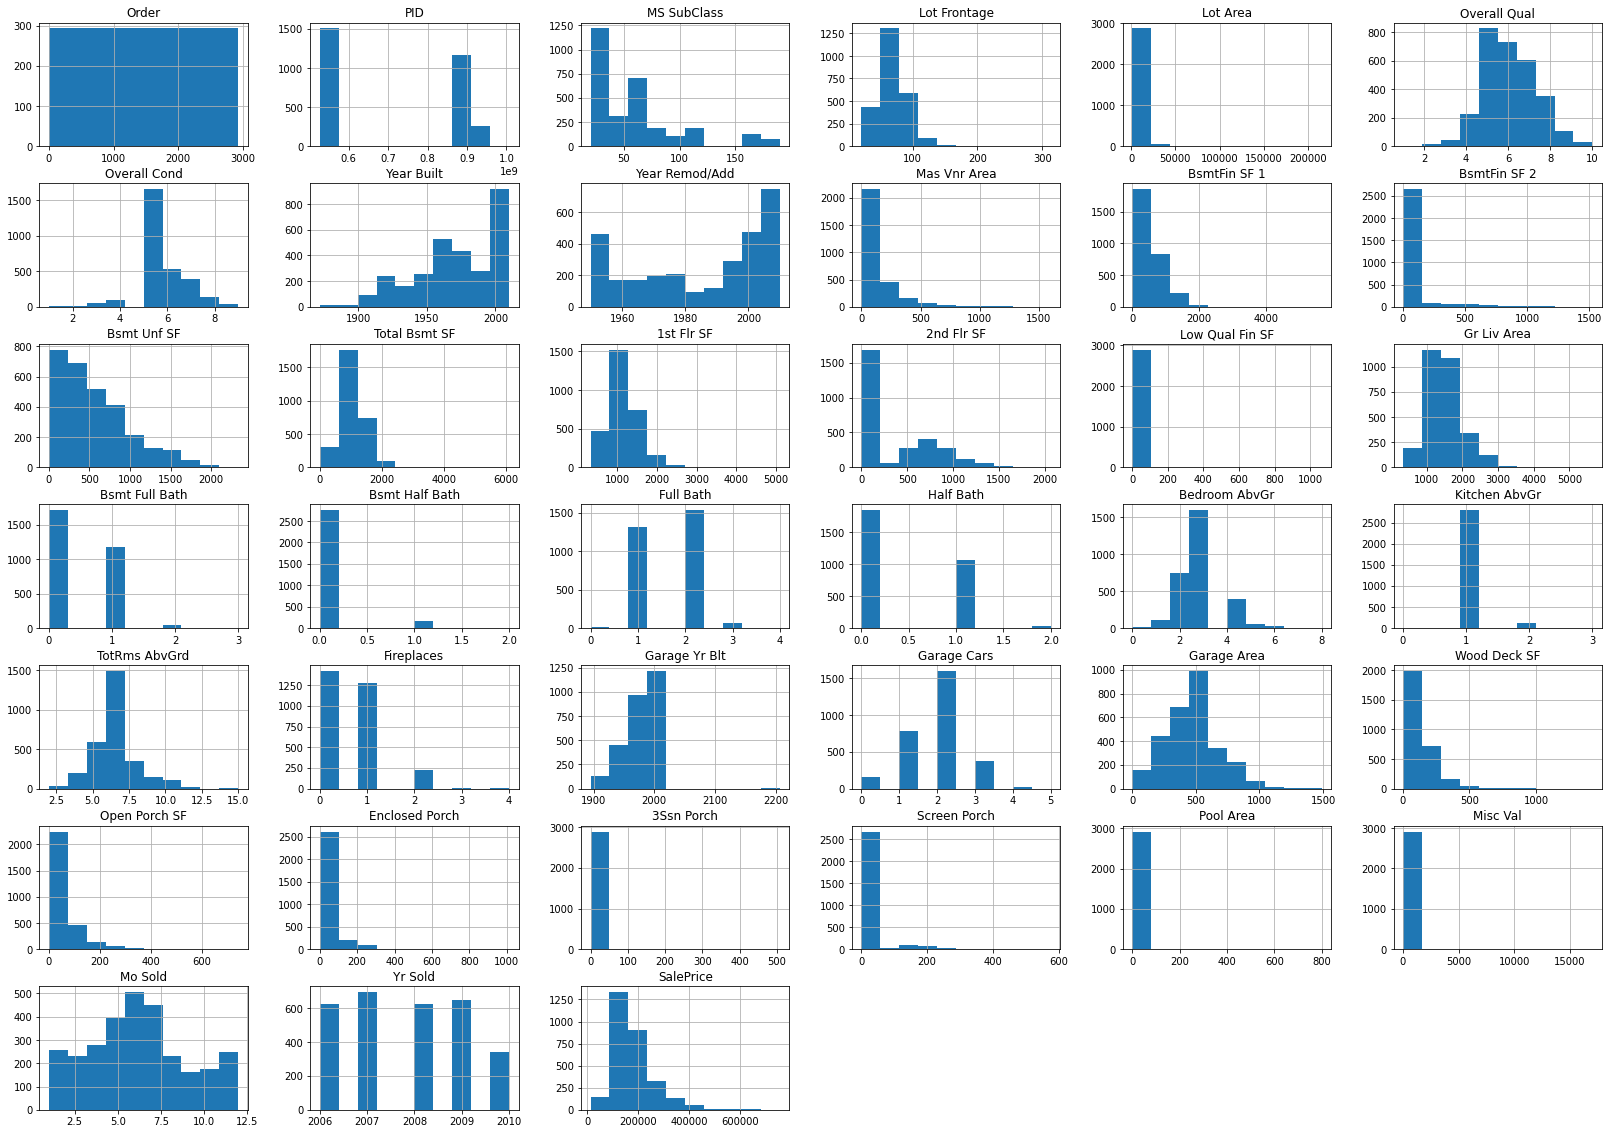

In [48]:
# Set default figure size.
plt.figure(figsize=(28,10))

# Show histogram
df.hist();

## Show columns with missing data

In [54]:
# Number of missing values for each column:
v_total_missing   = df.isnull().sum()

# Percentage out of total elements in each column (= df.shape[0]):
v_percent_missing = round(
    
    v_total_missing / df.shape[0] * 100,
                          
    ndigits = 1)

# Type of data for each column:
v_missing_type    = df.dtypes

# Create data frame showing statistics per column:
df_missing_data   = pd.DataFrame(
    
    {'type': v_missing_type,
     'total': v_total_missing,
     'percent': v_percent_missing})

# Sort data frame by 'total' (descending order):
df_missing_data   = df_missing_data.sort_values(by='total', ascending = False)

# Show first n columns with highest number of missing data:
df_missing_data.head(n=20)

,type,total,percent
Pool QC,object,2917,99.6
Misc Feature,object,2824,96.4
Alley,object,2732,93.2
Fence,object,2358,80.5
Fireplace Qu,object,1422,48.5
Lot Frontage,float64,490,16.7
Garage Cond,object,159,5.4
Garage Finish,object,159,5.4
Garage Yr Blt,float64,159,5.4
Garage Qual,object,159,5.4


### Replace empty cells (NA) by other value.
Suppose we want to apply a different strategy to number and object data.

In [60]:
# Let's first split the data frame in two data frames:

# Numbers:
df_number = df.select_dtypes(include = "number")

# Objects:
df_object = df.select_dtypes(exclude = "number")

# Show that the two data frames together contains as many columns as df:
print(
    df_number.shape[1],
    df_object.shape[1],
    df_number.shape[1] + df_object.shape[1],
    df.shape[1])

39 43 82 82


### Replace NA's in number data by median
We demonstrate two different approaches. The 'replace()' function replaces a value of choice by another value of choice. Where, the function 'fillna()' assumes we want to replace NA by another value of choice.

In [64]:
#df_number_imputed = df_number.replace(np.nan, df_number.median())
df_number_imputed = df_number.fillna(df_number.median())

# Show that imputed data no longer contains NA:
print(
    df_number.isna().sum().sum(),
    df_number_imputed.isna().sum().sum())        

682 0


### Replace NA's in object data by "100"

In [67]:
#df_object_imputed = df_object.replace(np.nan, "100")
df_object_imputed = df_object.fillna("100")

# Show that imputed data no longer contains NA:
print(
    df_object.isna().sum().sum(),
    df_object_imputed.isna().sum().sum())   

13315 0


In [68]:
# Put the two imputed data frames together again:
df_imputed = pd.concat([df_number_imputed, df_object_imputed], axis = 1)

print(
    df_imputed.shape,
    df.shape)

(2930, 82) (2930, 82)
